## Data Pre Processing part-1

## L-03


### 1.Handling missing value

### 2.Imbalance dataset issue

### 3. Outliers

### 4.converting/Encoding Data(catagorical to numerical)

### 5. Duplicte data

### 6. Splitting dataset

### 7. Scaling data

### 8. Featue Engineering


#### Part-1 Loading dataset from google drive and displaying dataset


In [27]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

# df.head(5) # first 5 rows

# df.tail() # last  5 rows

# df[80:85]  # split data

# df["Gender"] # only the venue column

# df["Gender"].head(5) # first 5 samples of the column venue

# df.loc[(df.Gender == "Male")] # all male informations

# df.loc[(df.Gender == "Male") & (df.Age  == "60")] 

# df.iloc[[0,5]] #print only 0 and 5 index 

# df.iloc[[0,1,2,3,4,5]] #print 0,1,2,3,4,5 index 

# df.iloc[[0:5]] #print  0 to  5 index 

# df["Gender"].iloc[100:200] # print only venue column from index 100 to 200

# df.columns

# len(df)


df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age,Gender,Weekness
0,6,148,72,35,0,33.6,0.627,1,10.0,Male,Yes
1,1,85,66,29,0,26.6,0.351,0,11.0,Female,No
2,8,183,64,0,0,23.3,0.672,1,12.0,male,No
3,1,89,66,23,94,28.1,0.167,0,13.0,Male,Yes
4,0,137,40,35,168,43.1,2.288,1,14.0,Female,Yes


#### Part-2 Handling Missing valuew


In [29]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

# df.isnull()

df.isnull().sum()

# df.info()

# df.describe()

# df1 = df
# df2 = df
# df3 = df

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
Age                         2
Gender                      2
Weekness                    6
dtype: int64

#### Dropping the entire row that has the missing value


In [30]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df1 = df

df1.dropna(subset=["Age"],inplace=True)# drop the row where value is null

df1.dropna(subset=["Gender"],inplace=True)

df1.dropna(subset=["Weekness"],inplace=True)

df.isnull().sum()

# len(df1)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
Age                         0
Gender                      0
Weekness                    0
dtype: int64

##### Don't Drop .Now we will put some value in the null Place for numeric null value it can be the mean/median/mode of the column and for the categorical value it can be the most frequent value of hte column


In [31]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df2 = df

#---numeric value it can be the most frequent value of mean/median/mode ----------

df2["Age"] = df2["Age"].fillna(df2["Age"].mean()) #replace by mean 

df2["Age"] = df2["Age"].fillna(df2["Age"].median()) # replace by median



In [32]:
#---categorical value it can be the most frequent value of hte column ----------

most_frequent_category = df2['Gender'].mode().iloc[0]
df2["Gender"].fillna(most_frequent_category,inplace=True)

In [33]:
df2.apply(lambda x:x.fillna(x.value_counts().index[0]))
df2.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age,Gender,Weekness
0,6,148,72,35,0,33.6,0.627,1,10.0,Male,Yes
1,1,85,66,29,0,26.6,0.351,0,11.0,Female,No
2,8,183,64,0,0,23.3,0.672,1,12.0,male,No
3,1,89,66,23,94,28.1,0.167,0,13.0,Male,Yes
4,0,137,40,35,168,43.1,2.288,1,14.0,Female,Yes


#### PART-3 Handeling categorical values or encoding

##### A . Labelencoding Convert = (object/catagorical to numerical )

##### Method-1


In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("diabetes.csv")

le = LabelEncoder()

df["Pregnancies"] = le.fit_transform(df["Pregnancies"])
df["Glucose"] = le.fit_transform(df["Glucose"])
df["BloodPressure"] = le.fit_transform(df["BloodPressure"])
df["SkinThickness"] = le.fit_transform(df["SkinThickness"])
df["Insulin"] = le.fit_transform(df["Insulin"])
df["BMI"] = le.fit_transform(df["BMI"])
df["DiabetesPedigreeFunction"] = le.fit_transform(df["DiabetesPedigreeFunction"])
df["Age"] = le.fit_transform(df["Age"])
df["Outcome"] = le.fit_transform(df["Outcome"])
df["Weekness"] = le.fit_transform(df["Weekness"])
df["Gender"] = le.fit_transform(df["Gender"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               299 non-null    int64
 1   Glucose                   299 non-null    int64
 2   BloodPressure             299 non-null    int64
 3   SkinThickness             299 non-null    int64
 4   Insulin                   299 non-null    int64
 5   BMI                       299 non-null    int64
 6   DiabetesPedigreeFunction  299 non-null    int64
 7   Outcome                   299 non-null    int64
 8   Age                       299 non-null    int64
 9   Gender                    299 non-null    int32
 10  Weekness                  299 non-null    int32
dtypes: int32(2), int64(9)
memory usage: 23.5 KB


##### Method-2

##### One hot Encoding


In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("diabetes.csv")
le = LabelEncoder()

one_hot_encoding_data = pd.get_dummies(df,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome','Gender','Weekness'])

# one_hot_encoding_data

one_hot_encoding_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Columns: 849 entries, Pregnancies_0 to Weekness_Yes
dtypes: bool(849)
memory usage: 248.0 KB


### PART-4 Imbalance dataset Issue


In [39]:
import pandas as pd


df = pd.read_csv("diabetes.csv")

# df["Weekness"].unique() # what is the unique values

# df["Weekness"].nunique()  # how many unique values?

value_counts = df.groupby("Weekness").size().reset_index(name="Count") # find unique value shortcart

value_counts

,Weekness,Count
0,No,118
1,Yes,175


##### Undersampling means reducing the major class samples to match minor class samples


In [42]:
from sklearn.utils import resample
import pandas as pd

df = pd.read_csv("diabetes.csv")


majority_class = df[df["Weekness"] == "Yes"]
minority_class = df[df["Weekness"] == "No"]

n_samples = len(minority_class)
majority_downsampled = resample(majority_class,replace=False,n_samples = n_samples,random_state=42)

balanced_df = pd.concat([minority_class,majority_downsampled])

print(n_samples)
print(balanced_df)


118
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
11            10      168             74              0        0  38.0   
..           ...      ...            ...            ...      ...   ...   
268            0      102             52              0        0  25.1   
5              5      116             74              0        0  25.6   
275            2      100             70             52       57  40.5   
83             0      101             65             28        0  24.6   
59             0      105             64             41      142  41.5   

     DiabetesPedigreeFunction  Outcome   Age  Gender Weekness  
1                       0.351        0  11.

In [43]:
value_counts = balanced_df.groupby('Weekness').size().reset_index(name='Count')
print(value_counts)

  Weekness  Count
0       No    118
1      Yes    118


#### Oversampleing (SMOTE) : increasing the sample of minor class


In [55]:
from imblearn.over_sampling import SMOTE
import pandas as pd

df = pd.read_csv("diabetes.csv")

X= df.drop('Weekness',axis=1)
y= df['Weekness']

smote = SMOTE(random_state=42)
X_resampled,y_resampled =smote.fit_resample(X,y)

oversampled_df = pd.DataFrame(X_resampled,columns=X.columns)
oversampled_df['Weekness'] = y_resampled

value_counts = oversampled_df.groupby('Weekness').size().reset_index(name="Count")  #find the shortcrt
value_counts

TypeError: '<' not supported between instances of 'str' and 'float'

### PART-5 Outlier finding and removing


#### Finding from figure


In [89]:
import pandas as pd
df = pd.read_csv('zomato.csv',encoding='latin-1') # font style
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


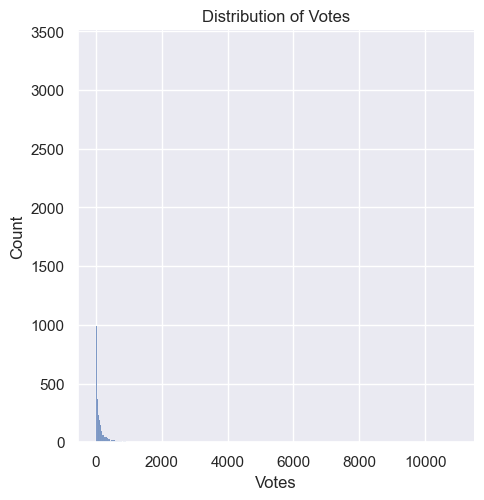

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('zomato.csv',encoding='latin-1') # font style

sns.set_theme(color_codes="red")
sns.displot(data=df["Votes"]).set(title="Distribution of Votes", xlabel= "Votes")



#### By finding Z-score approach[-3 to 3]


In [107]:
import pandas as pd

df = pd.read_csv('aug_train.csv') # font style
# df.head(1)

In [ ]:
import pandas as pd

df = pd.read_csv('aug_train.csv') # font style

z_score =(df["training_hours"] - df["training_hours"].mean())/df['training_hours'].std()

# z_score

# for i in z_score:
#     if i<-3:
#         print("yout have outlier", i)
#     elif i > 3:
#         print("yout have outlier",i)        
#     else:
#         continue
            


In [ ]:
index = z_score.index[z_score == 1.026218][0]

index

In [ ]:
df["training_hours"][4] # find the index where the outlier is 

df["training_hours"][4] = df["training_hours"].mean() # find the exact value of the index


df["training_hours"][4] # check if the value is updated or not

### Part-6 Handling duplicate samples


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('weight-height.csv')

In [14]:
duplicates = df[df.duplicated(keep='first')] # find the duplicates
duplicates

df_no_duplicates = df.drop_duplicates() # drop the duplicates

duplicates = df_no_duplicates[df_no_duplicates.duplicated(keep='first')] # recheck if there any duplicates reaming
duplicates

,Gender,Height,Weight


######


#### Part-7 : Feature Engineering


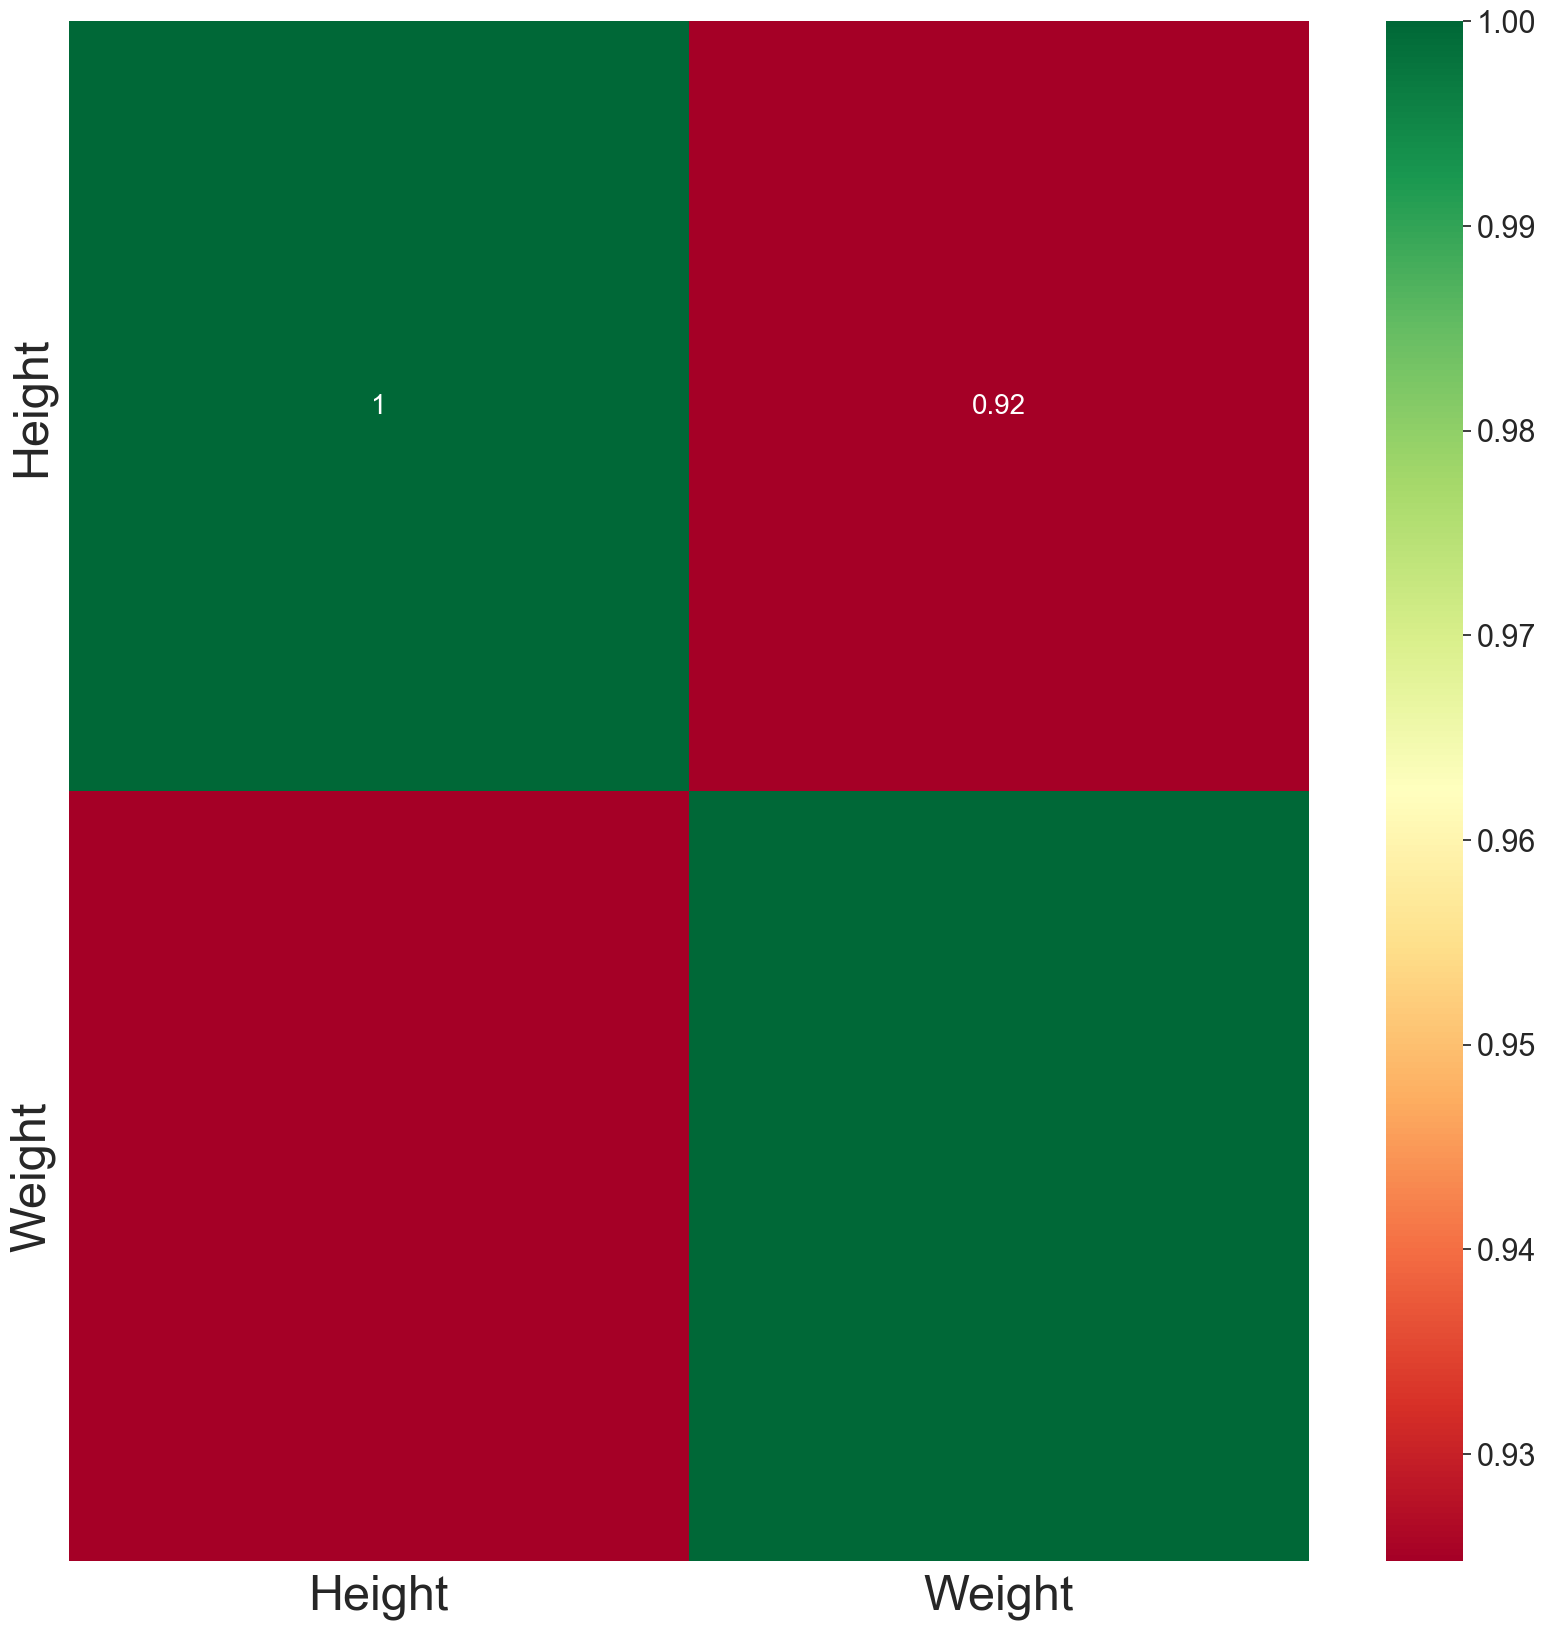

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('aug_train.csv') # font style


# Drop non-numeric columns
df_no_duplicates_numeric = df_no_duplicates.select_dtypes(include=['float64', 'int64'])

# Now compute the correlation matrix
correlation_matrix = df_no_duplicates_numeric.corr(method='pearson')

# Plot heatmap
sns.set(font_scale=2)
plt.subplots(figsize=(20, 20))
# Plot heatmap with corrected colormap
heat_plot = sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", annot_kws={'size': 20})

plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.show()


#### Part-7 : Separating feature and target


In [21]:
df_no_duplicates

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
from sklearn.utils import shuffle

In [25]:
shuffled_df = shuffle(df_no_duplicates)
shuffled_df.sample(5)

,Gender,Height,Weight
3337,Male,68.633157,193.937299
2677,Male,70.815880,186.597896
1503,Male,63.664688,160.125909
1326,Male,71.026543,186.229238
3858,Male,69.078707,204.244873


In [26]:
rearranged_df = shuffled_df.reset_index(drop=True)
rearranged_df.sample(5)

,Gender,Height,Weight
6736,Female,68.991691,183.638580
9844,Male,67.193523,183.810973
3905,Female,62.021163,136.013539
6364,Male,67.724182,176.269148
2687,Female,71.552205,185.658271


In [27]:
x = rearranged_df.drop(columns=['Gender'])
x.sample(5)

,Height,Weight
6852,65.394498,146.209595
3705,65.099636,180.793711
3623,65.883759,131.625265
7283,66.695309,155.128965
9562,71.778729,195.024269


In [ ]:
y = rearranged_df(columns=['Gender'])
y

## Part-8 : Scaling Data (Train and test dataset)


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [32]:
scaler1 = MinMaxScaler()
MinMax_scaled_df = scaler1.fit_transform(x)
MinMax_scaled_df

array([[0.41015633, 0.32551235],
       [0.53234499, 0.50768378],
       [0.67003827, 0.73674893],
       ...,
       [0.41187901, 0.40111405],
       [0.52550518, 0.47545241],
       [0.75984908, 0.63760063]])

In [33]:
scaler2 = MinMaxScaler()
MinMax_scaled_df = scaler2.fit_transform(x)
MinMax_scaled_df

array([[0.41015633, 0.32551235],
       [0.53234499, 0.50768378],
       [0.67003827, 0.73674893],
       ...,
       [0.41187901, 0.40111405],
       [0.52550518, 0.47545241],
       [0.75984908, 0.63760063]])

## Part-9 Splitting Data (Train and test dataset)


In [34]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
x_train.info()
y_train.info()

In [ ]:
print("train data size (features) : ", len(x_train))
print("train data size (target) : ", len(y_train))

print("train data size (features) : ", len(x_test))
print("train data size (target) : ", len(y_test))